In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load the dataset
df = pd.read_csv('World University Rankings 2023.csv')
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


### Preprocesamiento

In [40]:
for col in df.columns:
    isna_str = ""
    na_count_str = ""
    na_count = sum(df[col].isna())
    if na_count == 0:
        isna_str = "No "
    else:
        na_count_str = str(na_count)
    print(f"{isna_str}hay {na_count_str} valores faltantes en la columna '{col}'")


No hay  valores faltantes en la columna 'University Rank'
hay 108 valores faltantes en la columna 'Name of University'
hay 294 valores faltantes en la columna 'Location'
hay 132 valores faltantes en la columna 'No of student'
hay 133 valores faltantes en la columna 'No of student per staff'
hay 132 valores faltantes en la columna 'International Student'
hay 213 valores faltantes en la columna 'Female:Male Ratio'
hay 542 valores faltantes en la columna 'OverAll Score'
hay 542 valores faltantes en la columna 'Teaching Score'
hay 542 valores faltantes en la columna 'Research Score'
hay 542 valores faltantes en la columna 'Citations Score'
hay 542 valores faltantes en la columna 'Industry Income Score'
hay 542 valores faltantes en la columna 'International Outlook Score'


### Preprocesamiento estructural

In [20]:
# Verificar si hay columnas con descriptores que son valores y no variables
print(df.columns)

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score'],
      dtype='object')


### Preprocesamiento funcional

In [55]:
# Identificar y tratar valores faltantes
print(df.isnull().sum())
df = df.dropna(subset=['Name of University'])
df = df.fillna(value={'Name of University': 'Unknown', 'Location': 'Unknown', 'No of student': 0, 'No of student per staff': 0, 'International Student': 0, 'Female:Male Ratio': 0, 'OverAll Score': 0, 'Teaching Score': 0, 'Research Score': 0, 'Citations Score': 0, 'Industry Income Score': 0, 'International Outlook Score': 0})

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64


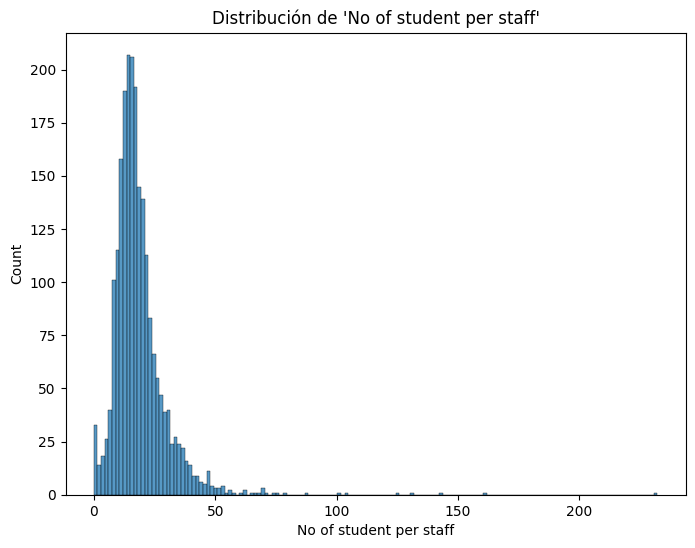

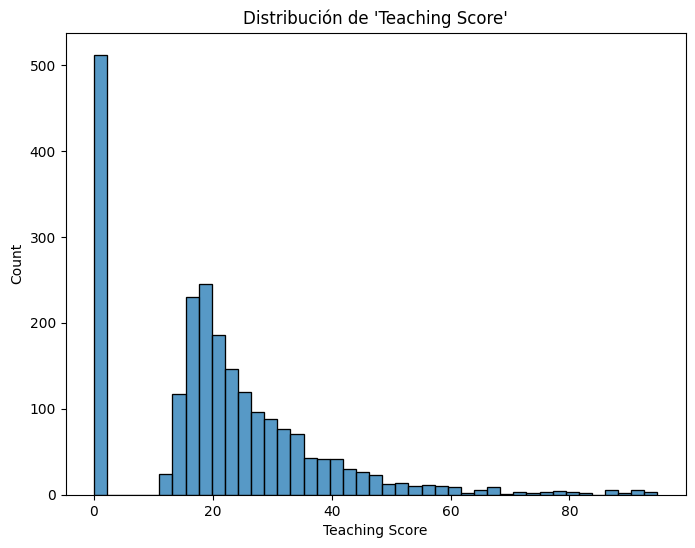

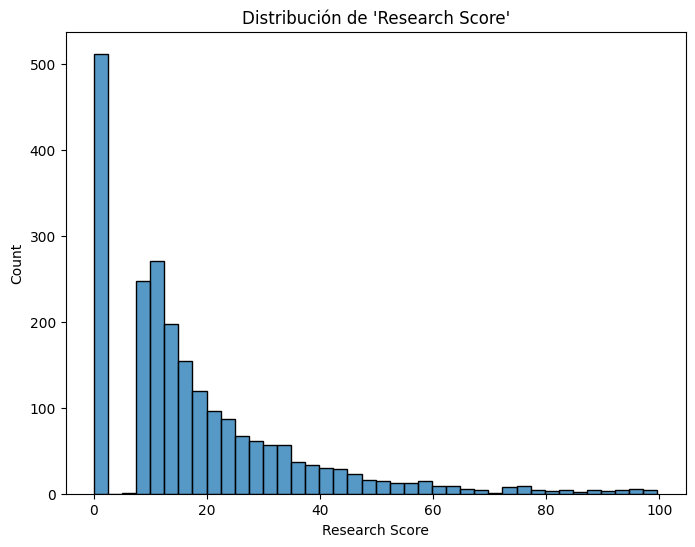

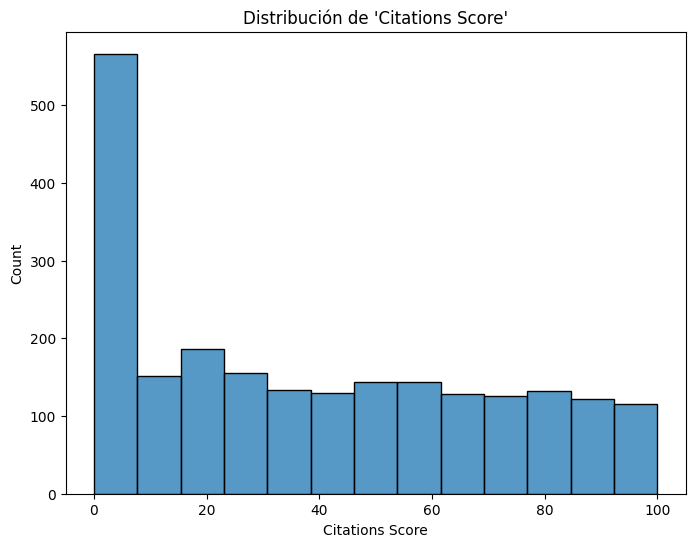

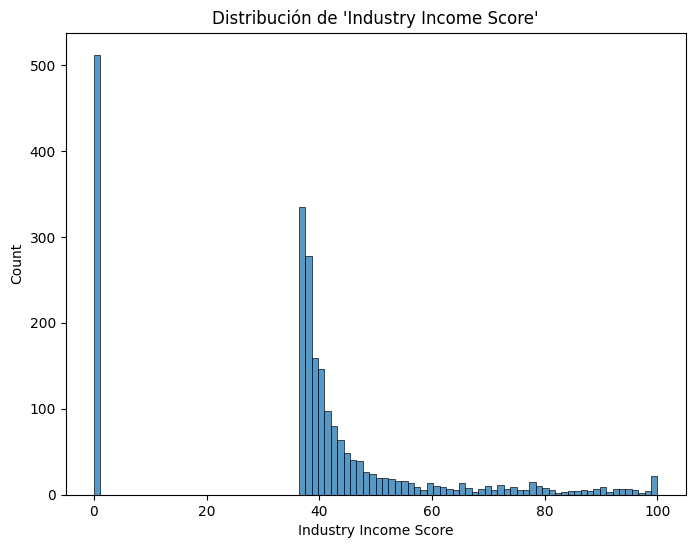

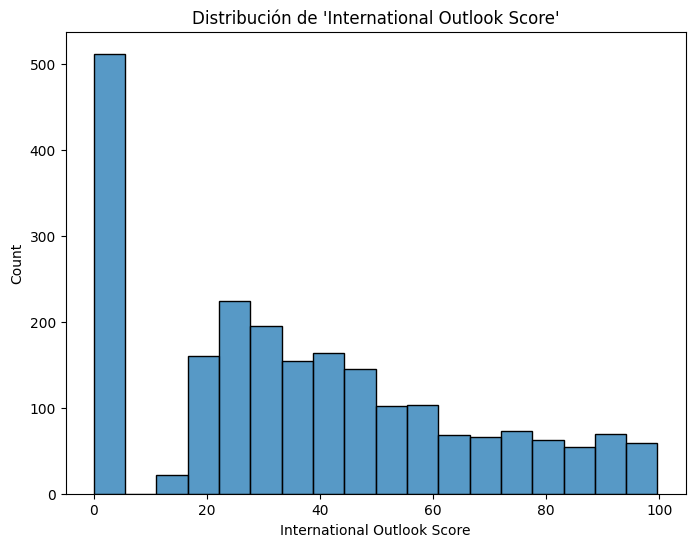

In [56]:
# Analizar la distribución de las variables numéricas
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col])
    plt.title(f"Distribución de '{col}'")
    plt.show()

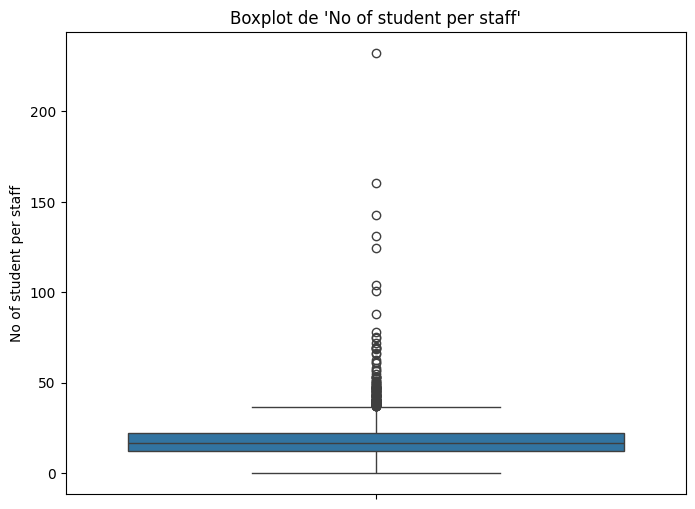

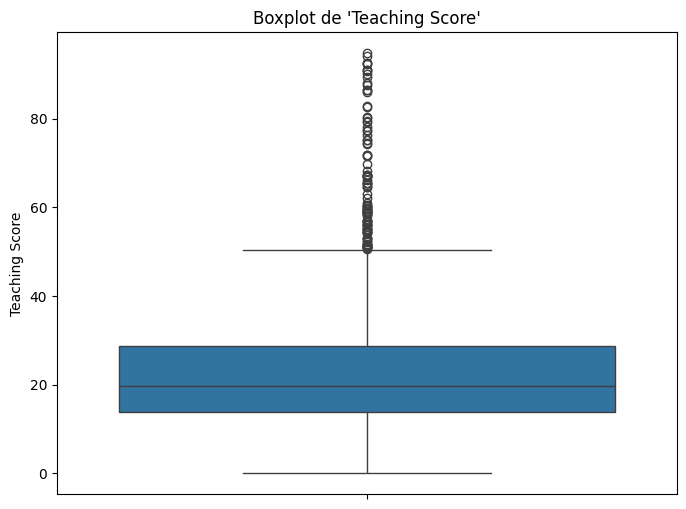

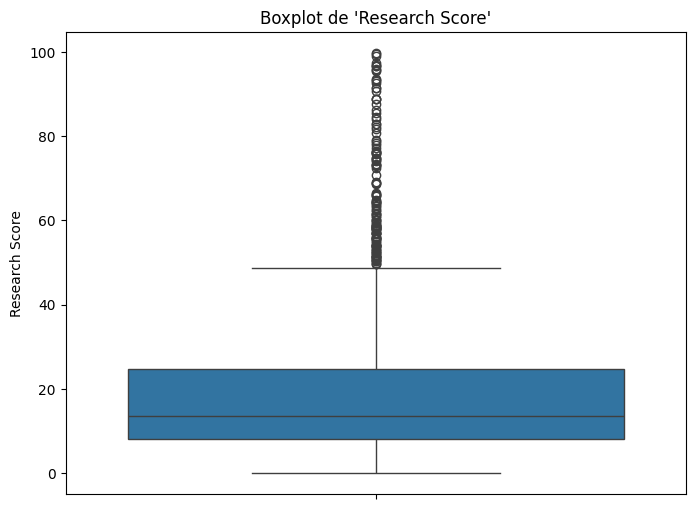

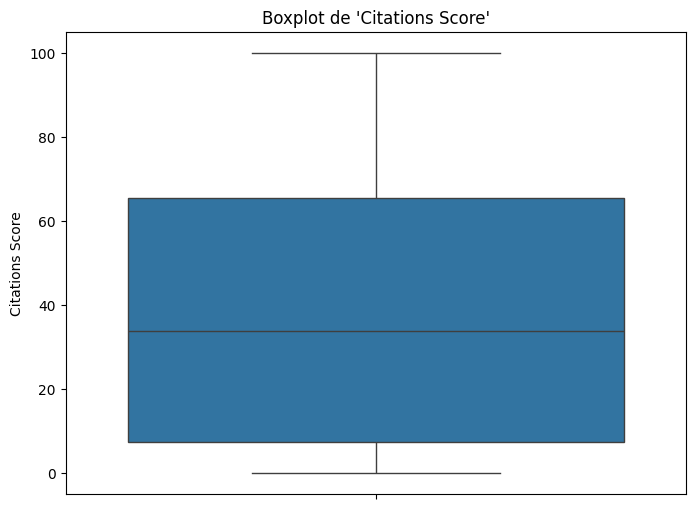

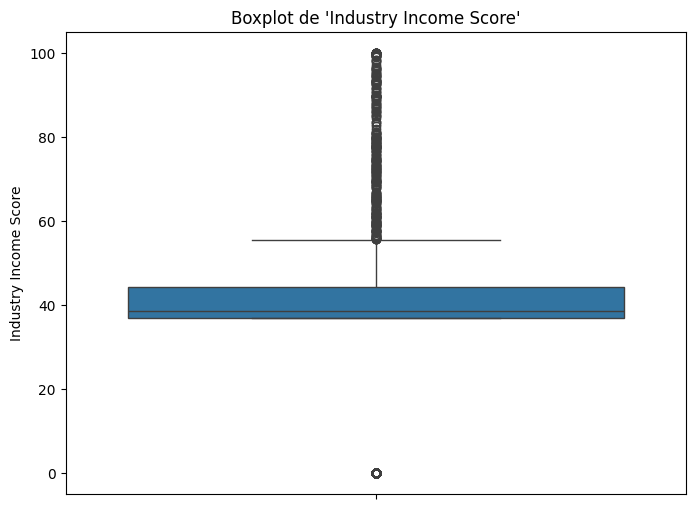

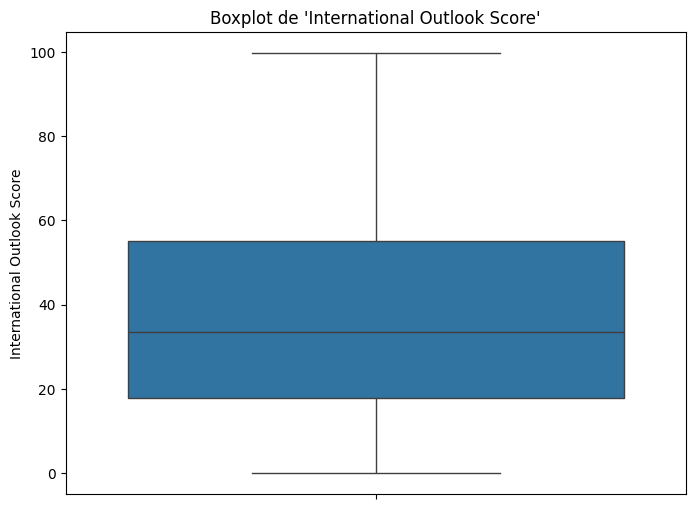

In [57]:
# Identificar y tratar valores atípicos
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f"Boxplot de '{col}'")
    plt.show()